In [2]:
import geopandas as gpd
import rasterio as rio
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.colors as colors
import matplotlib.colors as colors
import matplotlib.ticker as mticker
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs

In [5]:
cities = [
    "Albuquerque",
    "Atlanta",
    "Baltimore",
    "Boston", 
    "Boulder",
    "Chicago", 
    "Detroit",
    "Durham", 
    "Houston",
    "Kansas",
    "Las Vegas",
    "Los Angeles",
    "Miami",
    "Nashville",
    "New Orleans",
    "NYC",
    "Oklahoma",
    "San Francisco", 
    "Seattle", 
    "Washington DC"]

In [10]:
for city in cities:
    # This code loads the census tract shapefile for Durham County
    trav = gpd.read_file(f'../data/shapefiles/{city}/pm_trav.shp')

    # Convert to the same coordinate system as the desired NLCD data
    # it should always be EPSG:3857 (because that's in meters)
    trav = trav.to_crs(epsg=3857)
    bounds = trav.total_bounds

    # Add a buffer to the bounds (in meters) to make sure that we have sufficient space around the traversal path.
    # I recommend a buffer of 1000 meters, but to be conservative, you could make it 2000 meters, too. 
    print('before', bounds)
    bounds = [bounds[0]-1000, bounds[1]-1000, bounds[2]+1000, bounds[3]+1000]
    print('after', bounds)

    !gdalwarp ../Annual_NLCD_LndCov_2023_CU_C1V0.tif -te {bounds[0]} {bounds[1]} {bounds[2]} {bounds[3]} -t_srs EPSG:3857 -tr 10 10 -tap -of GTiff '../data/land/{city}_nlcd.tif'

before [-11887092.08089043   4161335.42377587 -11853764.69513929
   4193532.90677987]
after [np.float64(-11888092.08089043), np.float64(4160335.423775873), np.float64(-11852764.695139285), np.float64(4194532.906779872)]
Copying color table from ../Annual_NLCD_LndCov_2023_CU_C1V0.tif to new file.
Creating output file that is 3534P x 3421L.
Using internal nodata values (e.g. 250) for image ../Annual_NLCD_LndCov_2023_CU_C1V0.tif.
Copying nodata values from source ../Annual_NLCD_LndCov_2023_CU_C1V0.tif to destination ../data/land/Albuquerque_nlcd.tif.
Processing ../Annual_NLCD_LndCov_2023_CU_C1V0.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
before [-9407641.70746194  3988090.3887931  -9385877.07721949  4012320.63509133]
after [np.float64(-9408641.70746194), np.float64(3987090.388793101), np.float64(-9384877.077219494), np.float64(4013320.6350913304)]
Copying color table from ../Annual_NLCD_LndCov_2023_CU_C1V0.tif to new file.
Creating output file that is 2378P x

# Visualize the NLCD data

In [3]:
# Let's create a colormap with 15 colors, to match the 15 classes in the NLCD dataset.
custom_colors = [
    "royalblue",
    "mistyrose",
    "salmon",
    "red",
    "darkred",
    "tan",
    "lawngreen",
    "darkgreen",
    "yellowgreen",
    "goldenrod",
    "lemonchiffon",
    "yellow",
    "violet",
    "lightblue",
    "cyan"
]
cmap = colors.ListedColormap(custom_colors)

In [6]:
developed_land = {}
for city in cities:
    tif_nlcd = f'../data/land/{city}_nlcd.tif'
    with rio.open(tif_nlcd) as src:
        nlcd = src.read(1)
        bounds = src.bounds
    # Count the number of pixels in class 21-24
    developed_pixels = np.sum((nlcd >= 21) & (nlcd <= 24))
    # Calculate the total number of pixels in the image
    total_pixels = nlcd.size
    # Compute the percentage
    percentage = (developed_pixels / total_pixels) * 100
    developed_land[city] = percentage
    print(percentage)

    new_nlcd = nlcd.copy()
    for i, j in enumerate(np.unique(nlcd)):
        new_nlcd[nlcd==j] = i

    # Generate land cover colormap
    # fig = plt.figure(figsize=(10,10))

    # # Plot the raster data
    # img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))
    # gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    #                 linewidth=1, color='gray', alpha=0.8, linestyle='--', ylabel_style={'size': 13, 'rotation': 'vertical'}, xlabel_style={'size': 13})
    
    # img = plt.imshow(new_nlcd, extent=img_extent, cmap=cmap)

    # # Plot the points on top
    # # cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.03])
    # # cbar = plt.colorbar(img, cax=cbar_ax, orientation='horizontal', pad=0.05, shrink=0.8, )

    # # tick_labels = np.unique(nlcd)
    # # tick_positions = np.linspace(0.5,13.5,len(tick_labels))

    # # cbar.set_ticks(tick_positions)
    # # cbar.ax.set_xticklabels(tick_labels)
    # # cbar.ax.tick_params(labelsize=11)

    # fig.suptitle(f'{city} Land Cover', fontsize=20)


    # plt.savefig(f'../figures/{city}_nlcd.png', dpi=300, bbox_inches='tight')
    # plt.show()

58.15179621456542
89.89629915485445
59.315466202207666
85.16783987820573
56.01066611341946
75.30927220789665
76.00545346959011
58.90231869267375
77.40392984677824
86.59301285103784
47.93064733715258
78.94053963830027
90.79737242664807
78.23776224819103
54.88740807294267
83.35347492938729
55.23528609803482
57.36013015062691
43.30917454771237
89.32841217766928


# Length Scale vs. Developed Land Percentage

In [7]:
developed_land

{'Albuquerque': np.float64(58.15179621456542),
 'Atlanta': np.float64(89.89629915485445),
 'Baltimore': np.float64(59.315466202207666),
 'Boston': np.float64(85.16783987820573),
 'Boulder': np.float64(56.01066611341946),
 'Chicago': np.float64(75.30927220789665),
 'Detroit': np.float64(76.00545346959011),
 'Durham': np.float64(58.90231869267375),
 'Houston': np.float64(77.40392984677824),
 'Kansas': np.float64(86.59301285103784),
 'Las Vegas': np.float64(47.93064733715258),
 'Los Angeles': np.float64(78.94053963830027),
 'Miami': np.float64(90.79737242664807),
 'Nashville': np.float64(78.23776224819103),
 'New Orleans': np.float64(54.88740807294267),
 'NYC': np.float64(83.35347492938729),
 'Oklahoma': np.float64(55.23528609803482),
 'San Francisco': np.float64(57.36013015062691),
 'Seattle': np.float64(43.30917454771237),
 'Washington DC': np.float64(89.32841217766928)}

In [26]:
import pandas as pd

df = pd.DataFrame(developed_land.items(), columns=['City', 'Developed Land (%)'])
results_path = '../results/results.csv'
length_scales = pd.read_csv(results_path)
combined_df = pd.merge(df, length_scales, left_on='City', right_on='city')
combined_df = combined_df.drop(columns=['city'])

In [27]:
combined_df

City  Developed Land (%)    avg_r2  avg_length_scale_lat  \
0     Albuquerque           58.151796  0.692405            133.363246   
1         Atlanta           89.896299  0.951403           2284.323884   
2       Baltimore           59.315466  0.910260           1201.644736   
3          Boston           85.167840  0.944027           1883.587032   
4         Boulder           56.010666  0.913970            723.821369   
5         Chicago           75.309272  0.959714           3347.563894   
6         Detroit           76.005453  0.973727           1102.439372   
7          Durham           58.902319  0.968236            851.147800   
8         Houston           77.403930  0.978040           1756.959841   
9          Kansas           86.593013  0.809622             66.061205   
10      Las Vegas           47.930647  0.945271           5940.768807   
11    Los Angeles           78.940540  0.937691           3460.353745   
12          Miami           90.797372  0.987842           1606.636514   
13      Nashville           78.237762  0.942497           2370.178449   
14    New Orleans           54.887408  0.933614           2575.452126   
15            NYC           83.353475  0.924867            763.051377   
16       Oklahoma           55.235286  0.959531           5887.402478   
17  San Francisco           57.360130  0.966325           2237.527298   
18        Seattle           43.309175  0.948367           4162.298029   
19  Washington DC           89.328412  0.938826           1596.749067   

    avg_length_scale_lon  
0             128.842340  
1            2543.104557  
2            1506.423088  
3            2546.783981  
4             783.376625  
5            5144.394571  
6             697.271994  
7             795.692532  
8             939.118726  
9             136.489363  
10           5461.241298  
11           3130.311412  
12           1444.118909  
13           2498.672705  
14           2087.512877  
15           1008.741148  
16           6177.863241  
17           2336.492919  
18           5188.619780  
19           1858.900111

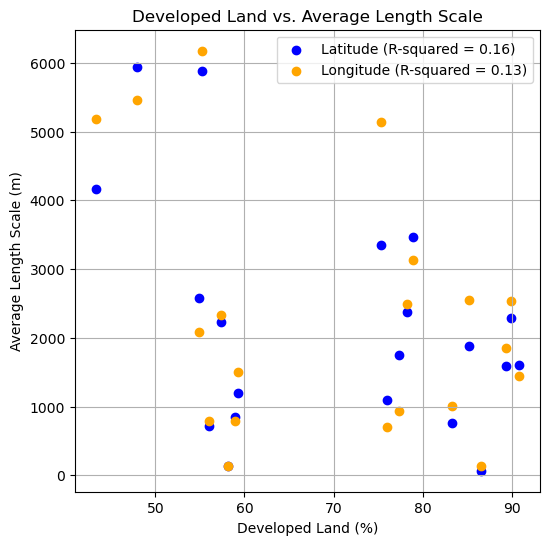

In [28]:
import numpy as np

import matplotlib.pyplot as plt

# Compute the correlation coefficient for each relationship
corr_lat = np.corrcoef(combined_df['Developed Land (%)'], combined_df['avg_length_scale_lat'])[0, 1]
corr_lon = np.corrcoef(combined_df['Developed Land (%)'], combined_df['avg_length_scale_lon'])[0, 1]

# Plot the line with r^2
plt.figure(figsize=(6, 6))
plt.scatter(combined_df['Developed Land (%)'], combined_df['avg_length_scale_lat'], c='blue', label='Latitude (R-squared = {:.2f})'.format(corr_lat**2))
plt.scatter(combined_df['Developed Land (%)'], combined_df['avg_length_scale_lon'], c='orange', label='Longitude (R-squared = {:.2f})'.format(corr_lon**2))
plt.title('Developed Land vs. Average Length Scale')
plt.xlabel('Developed Land (%)')
plt.ylabel('Average Length Scale (m)')
plt.grid(True)
plt.legend()
plt.show()

In [35]:
cluster1 = combined_df[(combined_df['avg_length_scale_lat'] < 3000) & (combined_df['Developed Land (%)'] < 60)]
cluster1 = cluster1['City'].tolist()
cluster1

cluster2 = combined_df[(combined_df['avg_length_scale_lat'] > 4000) & (combined_df['Developed Land (%)'] < 60)]
cluster2 = cluster2['City'].tolist()
cluster2

cluster3 = combined_df[(combined_df['avg_length_scale_lat'] < 4000) & (combined_df['Developed Land (%)'] > 70)]
cluster3 = cluster3['City'].tolist()
cluster3

['Atlanta',
 'Boston',
 'Chicago',
 'Detroit',
 'Houston',
 'Kansas',
 'Los Angeles',
 'Miami',
 'Nashville',
 'NYC',
 'Washington DC']

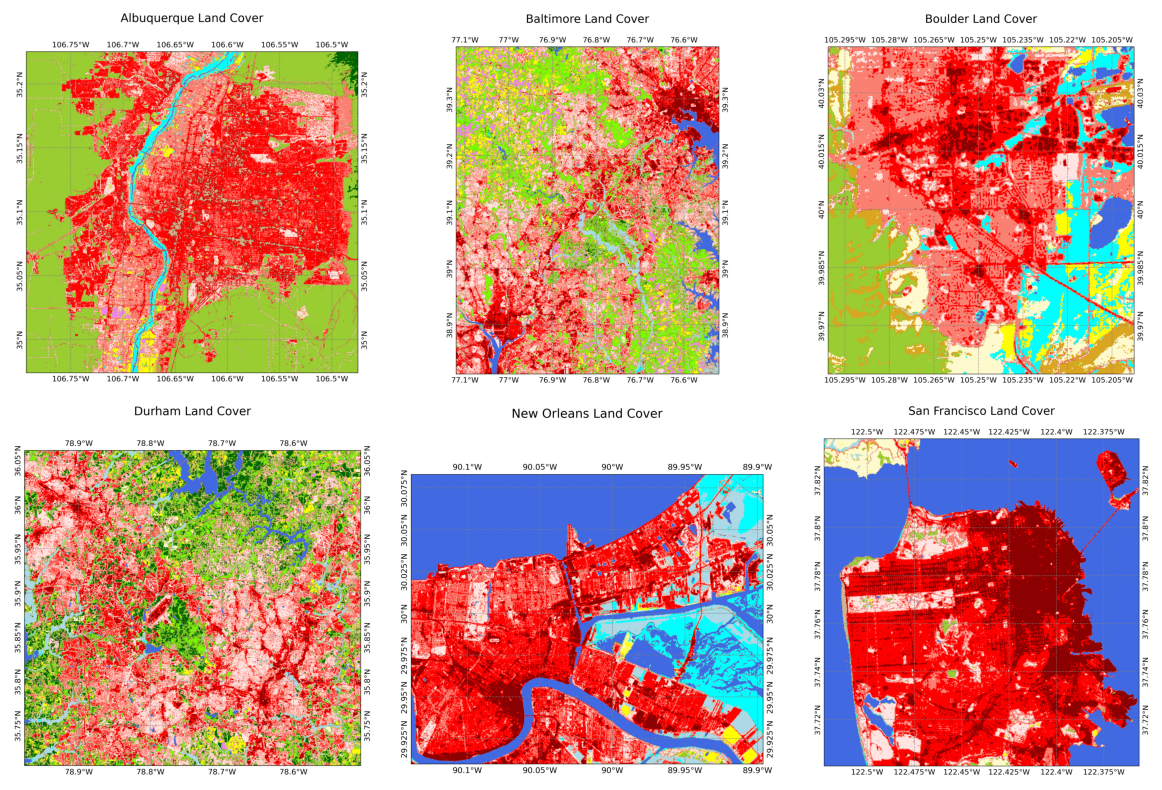

In [32]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for the subplot
num_rows = 2
num_cols = 3

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Iterate over the cluster1 cities and plot the images
for i, city in enumerate(cluster1):
    # Load the image for the city
    image_path = f'../figures/{city}_nlcd.png'
    image = plt.imread(image_path)

    # Determine the position of the image in the subplot
    row = i // num_cols
    col = i % num_cols

    # Plot the image in the corresponding subplot
    axes[row, col].imshow(image)
    axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

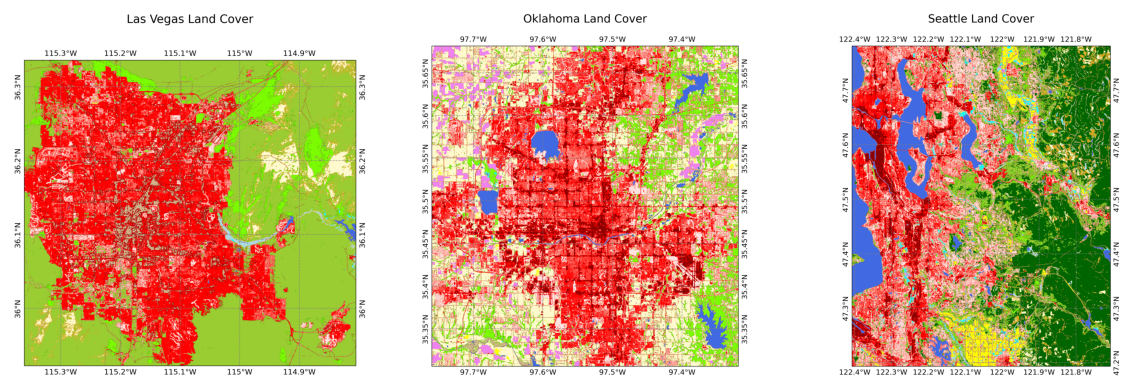

In [60]:
# Define the number of rows and columns for the subplot
num_rows = 1
num_cols = 3

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

# Iterate over the cluster2 cities and plot the images
for i, city in enumerate(cluster2):
    # Load the image for the city
    image_path = f'../figures/{city}_nlcd.png'
    image = plt.imread(image_path)

    # Determine the position of the image in the subplot
    col = i % num_cols
    
    # Plot the image in the corresponding subplot
    axes[col].imshow(image)
    axes[col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

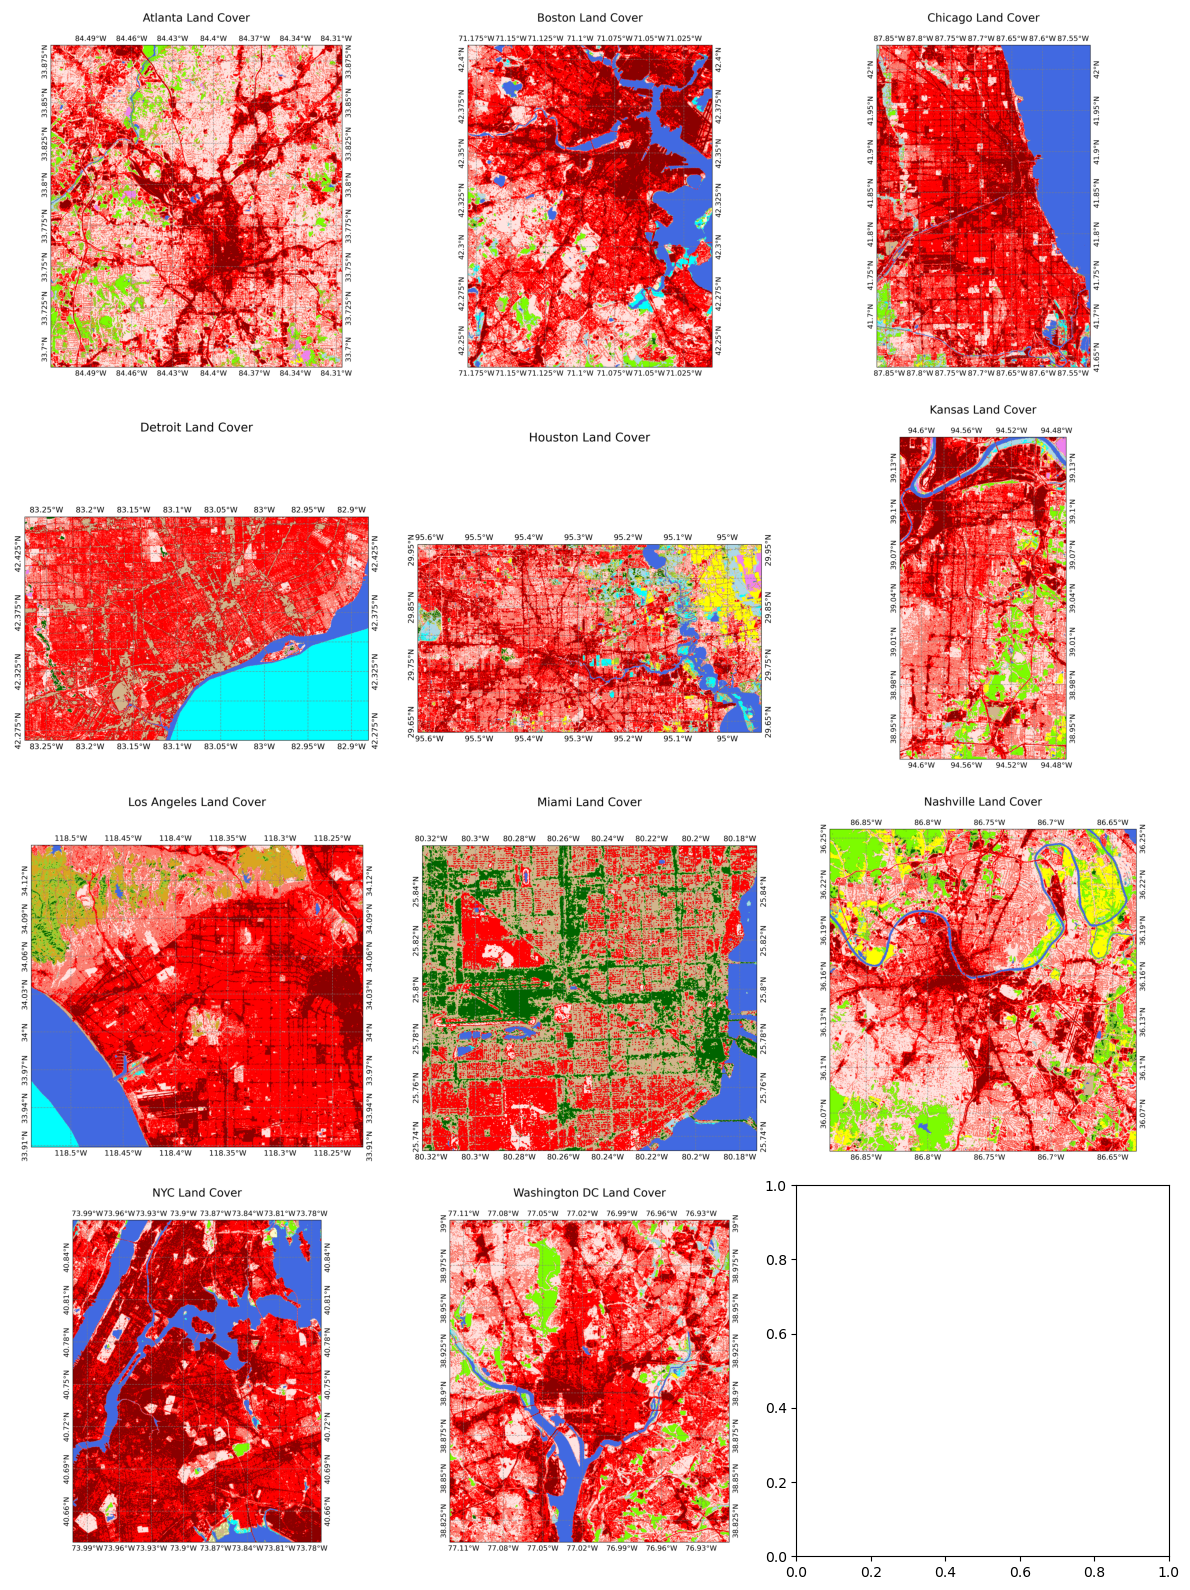

In [69]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for the subplot
num_rows = 4
num_cols = 3

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,16))

# Iterate over the cluster1 cities and plot the images
for i, city in enumerate(cluster3):
    # Load the image for the city
    image_path = f'../figures/{city}_nlcd.png'
    image = plt.imread(image_path)

    # Determine the position of the image in the subplot
    row = i // num_cols
    col = i % num_cols

    # Plot the image in the corresponding subplot
    axes[row, col].imshow(image)
    axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()